# Exploratory Data Analysis

The purpose of this notebook is to visually analyse prepared data and draw conclusions.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from datetime import datetime, timedelta

# let matplotlib plots be part of Jupyter Notebook
%matplotlib inline

# set up higher resolution for matplotlib plots
%config InlineBackend.figure_format = 'retina'

## Connect to Azure Machine Learning Service workspace

In [2]:
import azureml.core
from azureml.core import Workspace

ws = Workspace.from_config(path="../src_aml")

## Get latest run

In [3]:
from azureml.core import Experiment

experiment = Experiment(ws, "Data_Preparation_Pipeline")

latest_completed_run = None
for run in experiment.get_runs():
    if run.get_status() == "Finished":
        latest_completed_run = run
        break

## Pipeline steps outputs

### Ingest step - output

#### Download latest dataset 

In [4]:
def download_step_output(run, step_name, data_filename, dest_interim_folder, overwrite=True):
    download_location_base = os.path.join("..", "data", "interim", dest_interim_folder)
    # Retrieve the last step
    last_step = run.find_step_run(name=step_name)
    if last_step:
        last_step_obj = last_step[0] # since we have only one step with the name
        # download output from the last step
        last_step_obj.get_output_data(data_filename).download(download_location_base, overwrite)
        # return filepath to the downloaded file
        return os.path.join(download_location_base, "azureml", last_step[0].id, data_filename)

In [5]:
data_filepath = download_step_output(
    run=latest_completed_run, 
    step_name="Ingest json files and convert to csv", 
    data_filename="ingestion_output_pipeline_data",
    dest_interim_folder="after_ingestion",
    overwrite=False)

#### Load data

In [6]:
df = pd.read_csv(data_filepath, parse_dates=['Timestamp'])
df = df.set_index('Timestamp')

#### Quick dataset inspection 

In [7]:
df.head()

,Available Bikes,Bike Station Number
Timestamp,,
2019-10-25 15:20:00,8,15049
2019-10-25 15:20:00,9,15172
2019-10-25 15:20:00,4,15169
2019-10-25 15:20:00,7,15166
2019-10-25 15:20:00,0,15164


In [8]:
df.tail()

,Available Bikes,Bike Station Number
Timestamp,,
2020-02-08 23:10:00,2,15126
2020-02-08 23:10:00,3,15125
2020-02-08 23:10:00,0,15124
2020-02-08 23:10:00,4,15134
2020-02-08 23:10:00,3,15145


In [9]:
df.shape

(3035902, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3035902 entries, 2019-10-25 15:20:00 to 2020-02-08 23:10:00
Data columns (total 2 columns):
 #   Column               Dtype
---  ------               -----
 0   Available Bikes      int64
 1   Bike Station Number  int64
dtypes: int64(2)
memory usage: 69.5 MB


In [11]:
df = df.pivot_table(
    values='Available Bikes',
    index='Timestamp',
    columns='Bike Station Number')
df

Bike Station Number,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-10-25 15:20:00,3.0,11.0,3.0,37.0,1.0,5.0,1.0,9.0,6.0,2.0,...,1.0,1.0,2.0,2.0,5.0,2.0,5.0,4.0,3.0,NaN
2019-10-25 15:30:00,4.0,3.0,3.0,37.0,1.0,3.0,2.0,9.0,4.0,2.0,...,2.0,0.0,1.0,3.0,5.0,1.0,6.0,5.0,2.0,NaN
2019-10-25 15:40:00,5.0,3.0,1.0,36.0,1.0,2.0,2.0,7.0,3.0,2.0,...,2.0,0.0,3.0,3.0,4.0,1.0,5.0,5.0,2.0,NaN
2019-10-25 15:50:00,4.0,5.0,1.0,39.0,1.0,1.0,2.0,7.0,3.0,2.0,...,4.0,0.0,3.0,4.0,3.0,1.0,2.0,5.0,2.0,NaN
2019-10-25 16:00:00,4.0,8.0,5.0,40.0,2.0,1.0,2.0,7.0,2.0,1.0,...,4.0,0.0,2.0,3.0,3.0,1.0,3.0,6.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-08 22:30:00,3.0,0.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,...,0.0,4.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0
2020-02-08 22:40:00,3.0,0.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,...,0.0,4.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0
2020-02-08 22:50:00,3.0,0.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,...,0.0,4.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0


### Clean step - output

#### Download latest dataset 

In [12]:
data_filepath = download_step_output(
    run=latest_completed_run, 
    step_name="Data cleaning", 
    data_filename="cleaning_output_pipeline_data",
    dest_interim_folder="after_cleaning",
    overwrite=True)

#### Load data

In [13]:
# load data
df = pd.read_csv(data_filepath, parse_dates=['Timestamp'])
df = df.set_index('Timestamp')

#### Quick dataset inspection 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12676 entries, 2019-10-25 15:20:00 to 2020-02-08 23:10:00
Columns: 204 entries, 15001 to 15254
dtypes: float64(204)
memory usage: 19.8 MB


In [15]:
df.shape

(12676, 204)

In [16]:
# statistical characteristics of the dataset
df.describe()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
count,12676.000000,12676.000000,12676.000000,12676.000000,12676.000000,12676.000000,12676.000000,12676.00000,12676.000000,12676.000000,...,12676.000000,12676.00000,12676.000000,12676.000000,12676.00000,12676.000000,12676.000000,12676.000000,12676.000000,12676.000000
mean,3.522641,2.928132,4.719785,8.135768,1.911881,2.415825,3.338908,3.14776,3.492269,5.050647,...,2.468208,2.02485,2.249290,2.992111,1.76988,1.977280,2.491086,3.148864,2.553250,1.358552
std,4.489519,4.085994,6.443961,11.887830,1.794108,3.015374,3.450067,3.47427,3.068684,4.769160,...,3.703937,2.22312,3.264467,2.887738,2.04586,1.761599,3.013762,2.593150,3.086281,2.146386
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,0.00000,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,2.000000,4.000000,2.000000,1.000000,2.000000,2.00000,3.000000,4.000000,...,1.000000,1.00000,1.000000,2.000000,1.00000,2.000000,1.000000,3.000000,2.000000,0.000000
75%,4.000000,4.000000,6.000000,10.000000,3.000000,3.000000,5.000000,4.00000,5.000000,8.000000,...,3.000000,3.00000,3.000000,4.000000,3.00000,3.000000,3.000000,4.000000,3.000000,2.000000
max,34.000000,32.000000,38.000000,70.000000,11.000000,15.000000,29.000000,20.00000,20.000000,23.000000,...,29.000000,15.00000,24.000000,16.000000,10.00000,11.000000,13.000000,16.000000,17.000000,9.000000


In [17]:
df.head()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-10-25 15:20:00,3.0,11.0,3.0,37.0,1.0,5.0,1.0,9.0,6.0,2.0,...,1.0,1.0,2.0,2.0,5.0,2.0,5.0,4.0,3.0,0.0
2019-10-25 15:30:00,4.0,3.0,3.0,37.0,1.0,3.0,2.0,9.0,4.0,2.0,...,2.0,0.0,1.0,3.0,5.0,1.0,6.0,5.0,2.0,0.0
2019-10-25 15:40:00,5.0,3.0,1.0,36.0,1.0,2.0,2.0,7.0,3.0,2.0,...,2.0,0.0,3.0,3.0,4.0,1.0,5.0,5.0,2.0,0.0
2019-10-25 15:50:00,4.0,5.0,1.0,39.0,1.0,1.0,2.0,7.0,3.0,2.0,...,4.0,0.0,3.0,4.0,3.0,1.0,2.0,5.0,2.0,0.0
2019-10-25 16:00:00,4.0,8.0,5.0,40.0,2.0,1.0,2.0,7.0,2.0,1.0,...,4.0,0.0,2.0,3.0,3.0,1.0,3.0,6.0,2.0,0.0


In [18]:
df.tail()

,15001,15002,15003,15004,15005,15006,15007,15008,15009,15010,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-08 22:30:00,3.0,0.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,...,0.0,4.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0
2020-02-08 22:40:00,3.0,0.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,...,0.0,4.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0
2020-02-08 22:50:00,3.0,0.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,...,0.0,4.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0
2020-02-08 23:00:00,2.0,0.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,...,0.0,4.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0
2020-02-08 23:10:00,2.0,0.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,2.0,...,0.0,4.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0


In [19]:
# make sure dataframe has no missing data
assert df.isnull().sum().sum() == 0, "The dataframe contains some null values"

#### Visual inspection

In [20]:
df['Summer Season'] = df.index.to_series().apply(lambda x: x.month not in [12,1,2])

In [21]:
full_time_range= pd.date_range(start=df.index.min(), end=df.index.max(), freq='10Min')
missing_data_periods = sorted(set(full_time_range) - set(df.index))

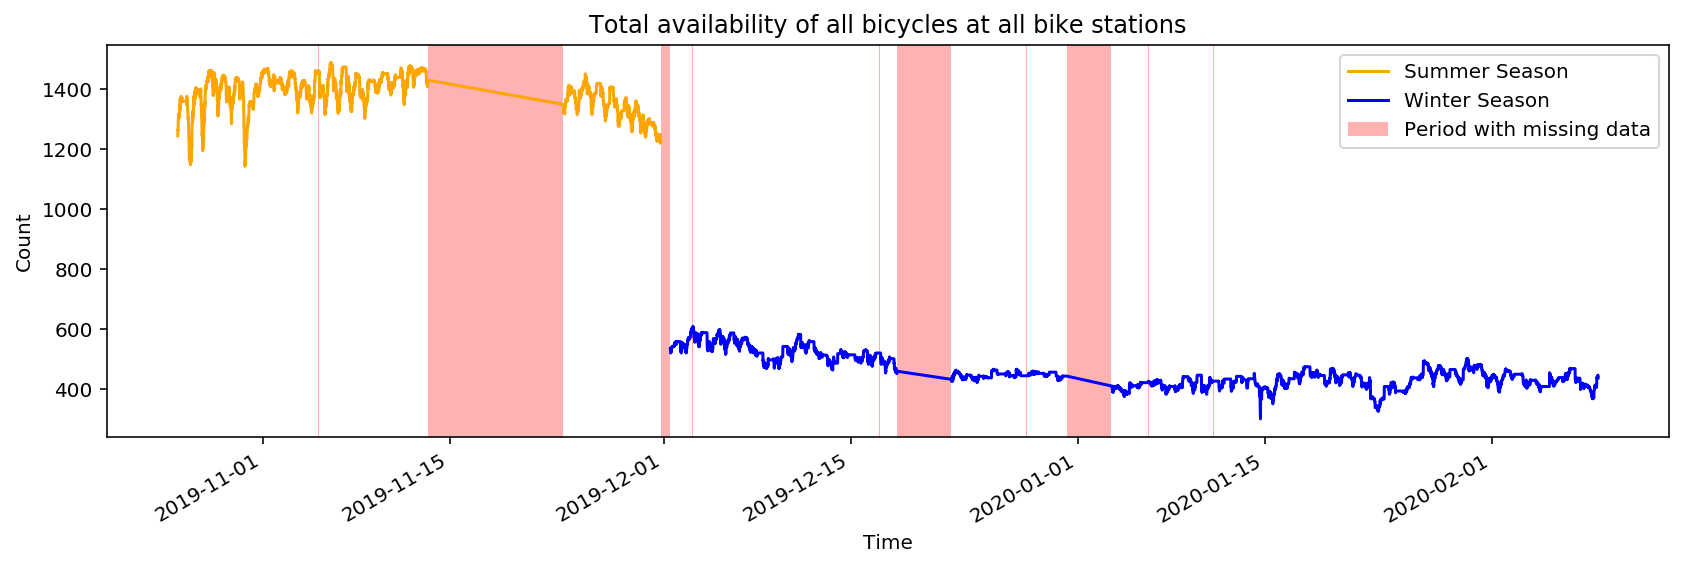

In [22]:
plt.figure(figsize=(14,4))
ax = df[ df['Summer Season'] == True ].sum(axis=1).plot(color='orange')
ax = df[ df['Summer Season'] == False ].sum(axis=1).plot(color='b')

# plot
for index in range(0, len(missing_data_periods)-1):
    period_start = missing_data_periods[index]
    period_end   = period_start + timedelta(minutes=10)
    plt.axvspan(period_start, period_end, facecolor='r', alpha=0.3)

ax.set_title('Total availability of all bicycles at all bike stations')
ax.set_xlabel('Time')
ax.set_ylabel('Count')
ax.legend(['Summer Season', 'Winter Season', 'Period with missing data']);

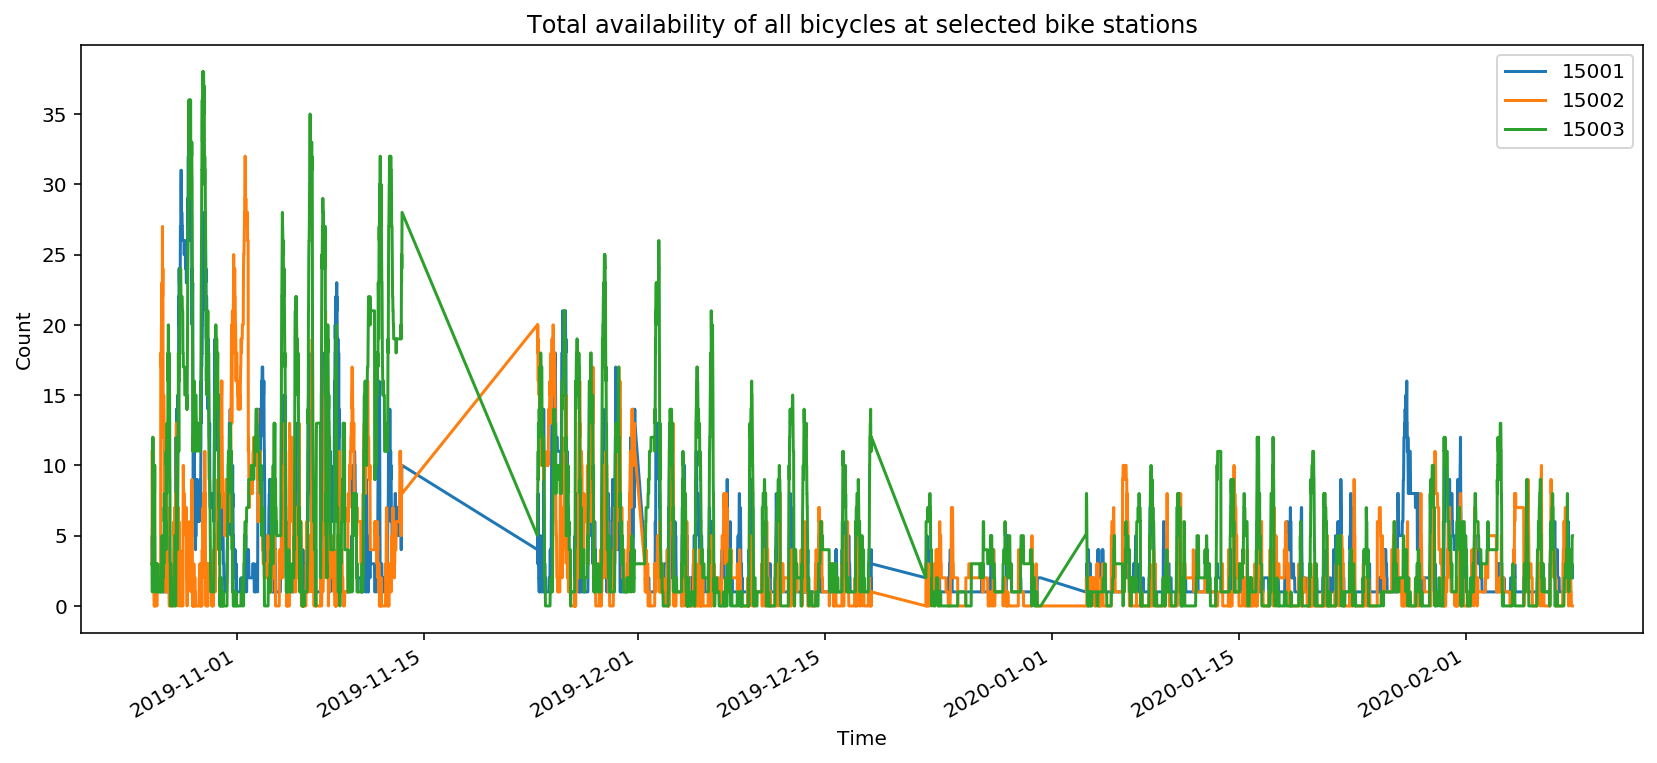

In [23]:
ax = df[['15001', '15002', '15003']].plot(figsize=(14,6))
ax.set_title('Total availability of all bicycles at selected bike stations')
ax.set_xlabel('Time')
ax.set_ylabel('Count');

### Featurization step - output

#### Download latest dataset 

In [24]:
data_filepath = download_step_output(
    run=latest_completed_run, 
    step_name="Data featurization", 
    data_filename="featurization_output_pipeline_data",
    dest_interim_folder="after_featurization",
    overwrite=True)

### Load data

In [25]:
# load data
df = pd.read_csv(data_filepath)
df

,Unnamed: 0,Timestamp,15001,15002,15003,15004,15005,15006,15007,15008,...,15195,15196,15197,15198,15199,15200,15251,15252,15253,15254
0,0,2019-10-25 15:20:00,3.0,11.0,3.0,37.0,1.0,5.0,1.0,9.0,...,1.0,1.0,2.0,2.0,5.0,2.0,5.0,4.0,3.0,0.0
1,1,2019-10-25 15:30:00,4.0,3.0,3.0,37.0,1.0,3.0,2.0,9.0,...,2.0,0.0,1.0,3.0,5.0,1.0,6.0,5.0,2.0,0.0
2,2,2019-10-25 15:40:00,5.0,3.0,1.0,36.0,1.0,2.0,2.0,7.0,...,2.0,0.0,3.0,3.0,4.0,1.0,5.0,5.0,2.0,0.0
3,3,2019-10-25 15:50:00,4.0,5.0,1.0,39.0,1.0,1.0,2.0,7.0,...,4.0,0.0,3.0,4.0,3.0,1.0,2.0,5.0,2.0,0.0
4,4,2019-10-25 16:00:00,4.0,8.0,5.0,40.0,2.0,1.0,2.0,7.0,...,4.0,0.0,2.0,3.0,3.0,1.0,3.0,6.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12671,12671,2020-02-08 22:30:00,3.0,0.0,5.0,2.0,2.0,1.0,2.0,4.0,...,0.0,4.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0
12672,12672,2020-02-08 22:40:00,3.0,0.0,5.0,2.0,2.0,1.0,2.0,4.0,...,0.0,4.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0
12673,12673,2020-02-08 22:50:00,3.0,0.0,5.0,2.0,2.0,1.0,2.0,4.0,...,0.0,4.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0
12674,12674,2020-02-08 23:00:00,2.0,0.0,5.0,2.0,2.0,1.0,2.0,4.0,...,0.0,4.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0
